<Figure size 700x700 with 0 Axes>

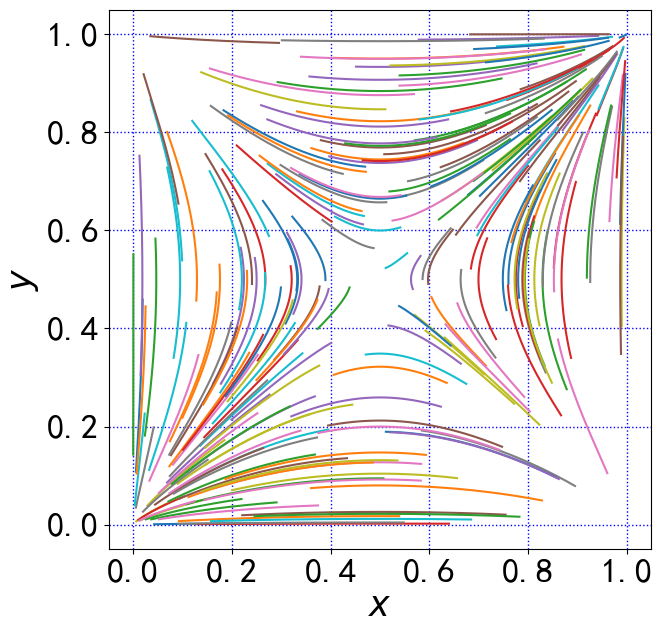

In [4]:

from pylab import *

plt.rcParams['axes.unicode_minus'] = False  #用于解决不能显示负号的问题
mpl.rcParams['font.sans-serif'] = ['SimHei']


#各博弈主体动态复制方程
def f(x, y):
    return x * (1 - x) * (5 * y - 2.5)


def g(x, y):
    return y * (1 - y) * (4 * x - 2)


#initX-x初始值
#initY-y初始值
#dt-步长
#epoch-迭代次数
def calculateValue(initX, initY, dt, epoch):
    x = []
    y = []
    #演化初始赋值
    x.append(initX)
    y.append(initY)
    #微量计算及append
    for index in range(epoch):
        tempx = x[-1] + (f(x[-1], y[-1])) * dt
        tempy = y[-1] + (g(x[-1], y[-1])) * dt

        x.append(tempx)
        y.append(tempy)
    return (x, y)


plt.figure(figsize=(7, 7))
D = []
#随机生成200个初始点
for index in range(200):
    random_a = np.random.random()
    random_b = np.random.random()
    #步长dt为0.001 迭代次数1000
    d = calculateValue(random_a, random_b, 0.001, 1000)
    D.append(d)
for n, m in D:
    plt.plot(n, m)
plt.ylabel("$y$", fontsize=25)
plt.xlabel("$x$", fontsize=25)
plt.tick_params(labelsize=25)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(linestyle=":", color="b", linewidth=1)
plt.show()

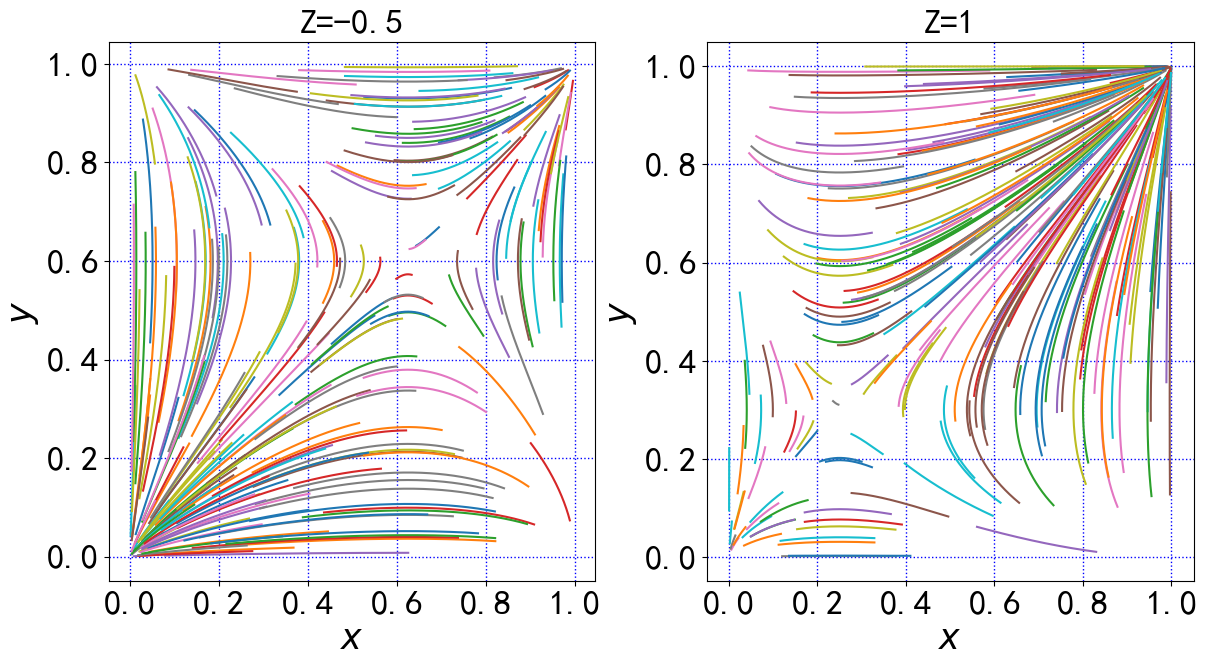

In [5]:

from pylab import *

plt.rcParams['axes.unicode_minus'] = False  #用于解决不能显示负号的问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
import random


#各博弈主体动态复制方程
def f(x, y):
    return x * (1 - x) * (5 * y + Z - 2.5)


def g(x, y):
    return y * (1 - y) * (4 * x + Z - 2)


#initX-x初始值
#initY-y初始值
#dt-步长
#epoch-迭代次数
def calculateValue(initX, initY, dt, epoch):
    x = []
    y = []

    #演化初始赋值
    x.append(initX)
    y.append(initY)

    #微量计算及append
    for index in range(epoch):
        tempx = x[-1] + (f(x[-1], y[-1])) * dt
        tempy = y[-1] + (g(x[-1], y[-1])) * dt

        x.append(tempx)
        y.append(tempy)
    return (x, y)


p1 = plt.figure(figsize=(14, 7))
plt.subplots_adjust(wspace=0.23)

#-----
Z = -0.5
D = []
for index in range(200):
    random_a = random.random()
    random_b = random.random()
    d = calculateValue(random_a, random_b, 0.001, 1000)
    D.append(d)
p1.add_subplot(1, 2, 1)
for n, m in D:
    plt.plot(n, m)
plt.title("Z=-0.5", fontsize=25)
plt.ylabel("$y$", fontsize=25)
plt.xlabel("$x$", fontsize=25)
plt.tick_params(labelsize=25)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# plt.title("Phase space")
plt.grid(linestyle=":", color="b", linewidth=1)
Z = 1
D = []
for index in range(200):
    random_a = random.random()
    random_b = random.random()
    d = calculateValue(random_a, random_b, 0.001, 1000)
    D.append(d)
p1.add_subplot(1, 2, 2)
for n, m in D:
    plt.plot(n, m)
plt.title("Z=1", fontsize=25)
plt.ylabel("$y$", fontsize=25)
plt.xlabel("$x$", fontsize=25)
plt.tick_params(labelsize=25)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# plt.title("Phase space")
plt.grid(linestyle=":", color="b", linewidth=1)
plt.show()

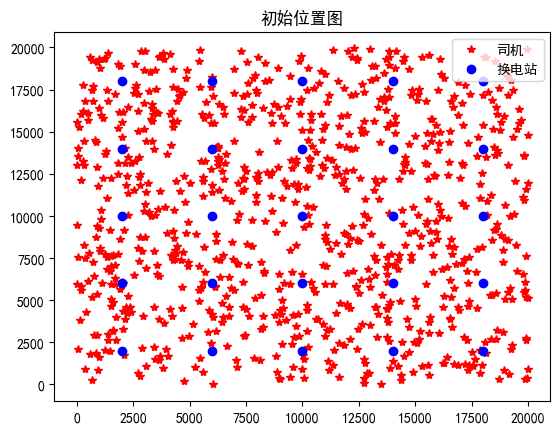

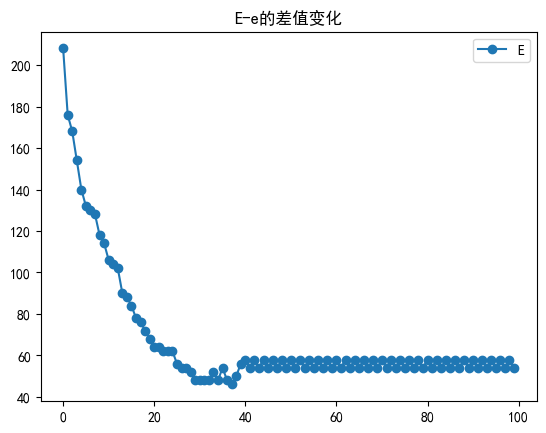

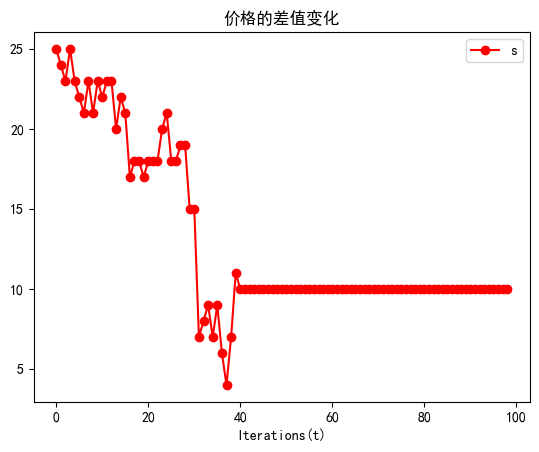

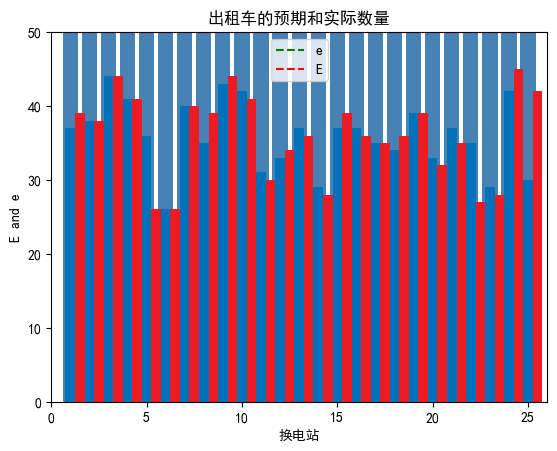

In [6]:
#导入相关库
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
#解决图标题中文乱码问题
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

#初始化各参数
n = 900  #换电需求数
min_price = 170  #换电价格范围
max_price = 230
A = np.random.normal(36, 5, 25)  #初始期望，平均值为36，方差为5的高斯分布
E = np.floor(A)  #朝0方向取整，如，4.1，4.5，4.8取整都是4
# 下面是根据需求数调整E的大小
E = np.floor(A)
a = sum(E) - n
A = A - a / 25
E = np.floor(A)
b = sum(E) - n
A = A - b / 25
E = np.floor(A)
a1 = 0.05;
a2 = 0.95;  #距离成本与换点价格权重
x = [random.random() * 20000 for i in range(n)]  #初始化需求车辆位置
y = [random.random() * 20000 for i in range(n)]
H = np.mat([[2, 2], [2, 6], [2, 10], [2, 14], [2, 18],
            [6, 2], [6, 6], [6, 10], [6, 14], [6, 18],
            [10, 2], [10, 6], [10, 10], [10, 14], [10, 18],
            [14, 2], [14, 6], [14, 10], [14, 14], [14, 18],
            [18, 2], [18, 6], [18, 10], [18, 14], [18, 18]]) * 1000
# 制初始化的司机与换电站的位置图
plt.plot(x, y, 'r*')
plt.plot(H[:, 0], H[:, 1], 'bo')
plt.legend(['司机', '换电站'], loc='upper right', scatterpoints=1)
plt.title('初始位置图')
plt.show()

# 计算期望与实际期望
D = np.zeros((len(H), n))  #需求车辆到各换电站的需求比例
price = 200 * np.ones((1, 25))
for i in range(len(H)):
    for j in range(len(x)):
        D[i, j] = a1 * np.sqrt(((H[i, 0] - x[j])) ** 2 + (H[i, 1] - y[j]) ** 2) + a2 * price[0, i]

D = D.T  #转置
D = D.tolist()  #转为列表格式
d2 = [D[i].index(np.min(D[i])) for i in range(n)]
C = Counter(d2)
e = list(C.values())
err = sum(abs(E - e))  #期望差之和，即博弈对象

#博弈过程
J = []  #价格变化的差值
ER = [err]  #E-e的变化差值
for k in range(1, 100):
    j = 0
    for i in range(25):
        if e[i] < E[i] and price[0, i] >= min_price:
            price[0, i] = price[0, i] - 1
            j = j + 1
        if e[i] > E[i] and price[0, i] <= max_price:
            price[0, i] = price[0, i] + 1
            j = j + 1
    J.append(j)
    DD = np.zeros((len(H), n))  #需求车辆到各换电站的需求比例
    #     price=200*np.ones((1,25))
    for i in range(len(H)):
        for j in range(len(x)):
            DD[i, j] = a1 * np.sqrt(((H[i, 0] - x[j])) ** 2 + (H[i, 1] - y[j]) ** 2) + a2 * price[0, i]

    DD = DD.T  #转置
    DD = DD.tolist()  #转为列表格式
    dd2 = [DD[i].index(np.min(DD[i])) for i in range(n)]
    C = Counter(dd2)
    e = [C[i] for i in sorted(C.keys())]
    err = sum(abs(E - e))  #期望差之和，即博弈对象
    ER.append(err)

#绘制图
plt.plot(ER, '-o')
plt.title('E-e的差值变化')
# plt.set(gcf,'unit','normalized','position',[0.2,0.2,0.64,0.32])
plt.legend('E-e')
# plt.grid(ls=":",c='b',)#打开坐标网格
plt.show()

plt.plot(J, 'r-o')
plt.title('价格的差值变化')
plt.xlabel('Iterations(t)')
plt.legend('sum of Price(t)-Price(t-1)')
# plt.grid(ls=":",c='b',)#打开坐标网格
plt.show()

plt.bar(x=range(1, 26),  # 指定条形图x轴的刻度值
        height=price[0],
        color='steelblue',
        width=0.8
        )
plt.plot([1, 26], [min_price, min_price], 'g--')
plt.plot([1, 26], [max_price, max_price], 'r--')
plt.title('换电站的换电价格')
plt.ylabel('Price(￥)')
plt.axis([0, 26, 0, 300])
# plt.grid(ls=":",c='b',)#打开坐标网格
plt.show

index = np.arange(1, 26)
rects1 = plt.bar(index, e, 0.5, color='#0072BC')
rects2 = plt.bar(index + 0.5, E, 0.5, color='#ED1C24')
plt.axis([0, 26, 0, 50])
plt.title('出租车的预期和实际数量')
plt.ylabel('E and e')
# plt.grid(ls=":",c='b',)#打开坐标网格
plt.xlabel('换电站')
plt.legend(['e', 'E'])
plt.show()

In [10]:
def factorials(x):
    '''
    利用递归的阶乘计算函数
    :return:
    '''
    if x == 0 or x == 1:
        return 1
    else:
        return x * factorials(x - 1)


class QueuingTheory(object):
    def __init__(self, ar, sr, snum):
        '''
        排队论模型初始化
        :param  ar:顾客到达率
        :param  sr:机构服务率
        :param  snum:服务台数量
        '''
        self.ar = ar
        self.sr = sr
        self.snum = snum
        self.ro = self.ar / self.sr
        self.ros = self.ar / (self.sr * self.snum)
        self.p0 = self.P0_Compute()  #系统中所有机器人空闲的概率
        self.cw = self.CW_Compute()  #系统中订单排队的概率
        self.lq = self.Lq_Compute()  #系统中排队等待的平均订单数
        self.ls = self.lq + self.ro  #系统中的平均订单数
        self.rw = (self.snum - self.ls) / self.snum  #系统中单个机器人的平均空闲率
        self.ws = self.ls / self.ar  #系统中订单的平均等待时间
        self.wq = self.lq / self.ar  #系统中订单的平均排队时间

    def P0_Compute(self):
        '''
        系统中所有机器人空闲的概率
        :return:
        '''
        result = 0
        ro, ros = self.ar / self.sr, self.ar / (self.sr * self.snum)
        for k in range(self.snum):
            result += ro ** k / factorials(k)
            result += ro ** self.snum / factorials(self.snum) / (1 - ros)
        return 1 / result if (1 / result) > 0 else 0

    def CW_Compute(self):
        '''
        订单排队的概率
        :return:
        '''
        ro, ros = self.ar / self.sr, self.ar / (self.sr * self.snum)
        return ro ** self.snum * self.p0 / factorials(self.snum) / (1 - ros)

    def Lq_Compute(self):
        '''
        排队等待的平均订单数
        :return:
        '''
        ros = self.ar / (self.sr * self.snum)
        return self.cw * ros / (1 - ros)


def main():
    ar, sr, snum = list(map(float, input('请输入系统到达率，服务率和服务台数量：').split(',')))
    snum = int(snum)
    myqueuing = QueuingTheory(ar, sr, snum)

    print('系统中所有机器人空闲的概率为%6.3f' % myqueuing.p0)
    print('系统中订单排队的概率为%6.3f' % myqueuing.cw)
    print('系统中单个机器人的平均空闲率为%6.3f' % myqueuing.rw)
    print('系统中排队等待的平均订单数为%6.3f' % myqueuing.lq)
    print('系统中的平均订单数为%6.3f' % myqueuing.ls)
    print('系统中订单的平均排队时间为%6.3f分钟' % (myqueuing.wq * 60))
    print('系统中订单的平均等待时间为%6.3f分钟' % (myqueuing.ws * 60))
    print('系统总成本为%6.3f元' % (1000 * snum + myqueuing.lq * 100))


if __name__ == '__main__':
    main()

系统中所有机器人空闲的概率为 0.000
系统中订单排队的概率为-0.000
系统中单个机器人的平均空闲率为-0.250
系统中排队等待的平均订单数为 0.000
系统中的平均订单数为25.000
系统中订单的平均排队时间为 0.000分钟
系统中订单的平均等待时间为 5.000分钟
系统总成本为20000.000元


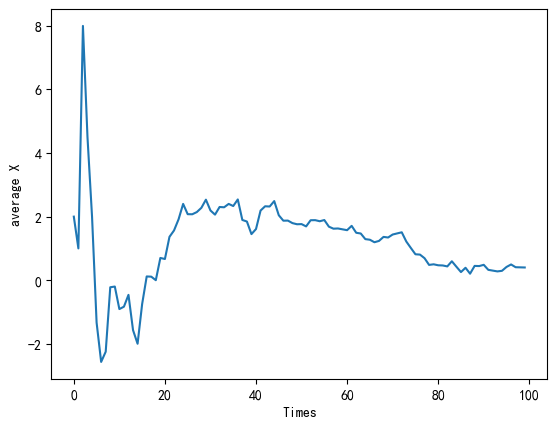

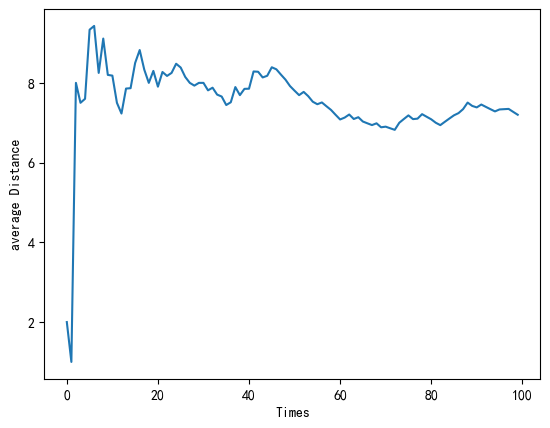

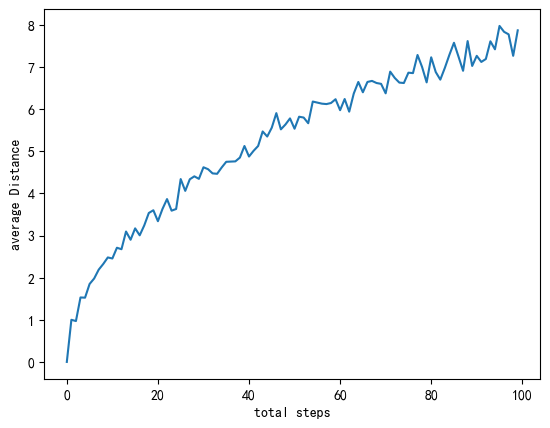

In [12]:
# This Python file uses the following encoding: utf-8
### 这段代码模拟了一维随机游走过程，完整运行这段代码后会绘制三个统计图，对应报告的图1 2 3
import matplotlib.pyplot as plt


def randomWalk(nsteps):  # 输入随机游走总步数，返回最终坐标
    x = 0
    for i in range(nsteps):
        x += (random.randint(1, 2) - 1.5) * 2
    return x


sumX = 0
sumXabs = 0
averageX = []
averageDist = []
for i in range(100):
    x = randomWalk(100)
    sumX += x
    sumXabs += abs(x)
    averageX.append(sumX * 1.0 / (i + 1))
    averageDist.append(sumXabs * 1.0 / (i + 1))

plt.xlabel('Times')
plt.ylabel('average X')
plt.plot(averageX)
plt.show()

plt.xlabel('Times')
plt.ylabel('average Distance')
plt.plot(averageDist)
plt.show()

distlList = []
sumDist = 0
for i in range(100):
    sumDist = 0
    for j in range(400):
        x = randomWalk(i)
        sumDist += abs(x)
        if j == 399:
            distlList.append(sumDist * 1.0 / (j + 1))

plt.xlabel('total steps')
plt.ylabel('average Distance')
plt.plot(distlList)
plt.show()

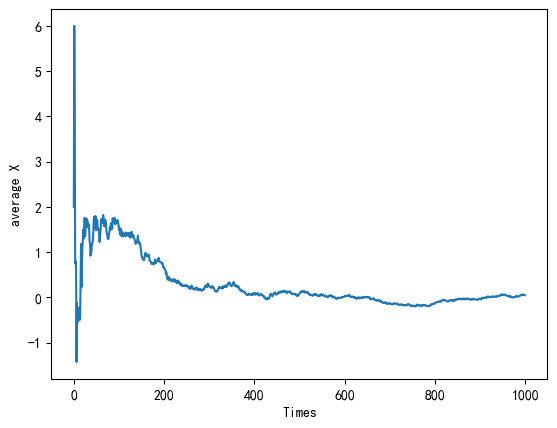

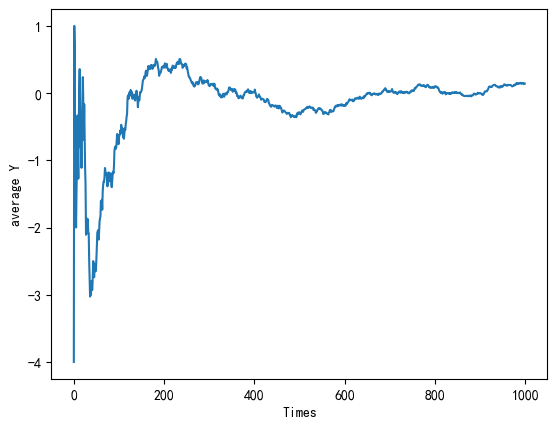

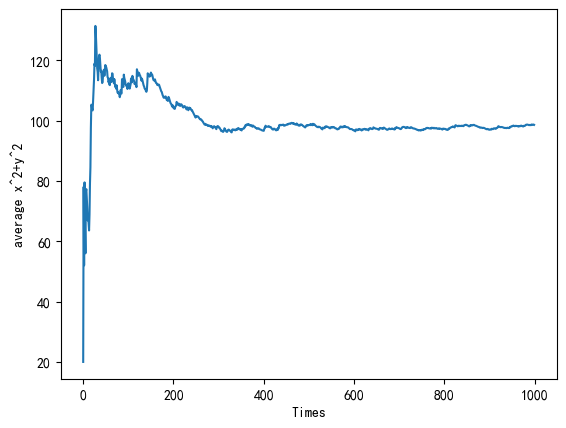

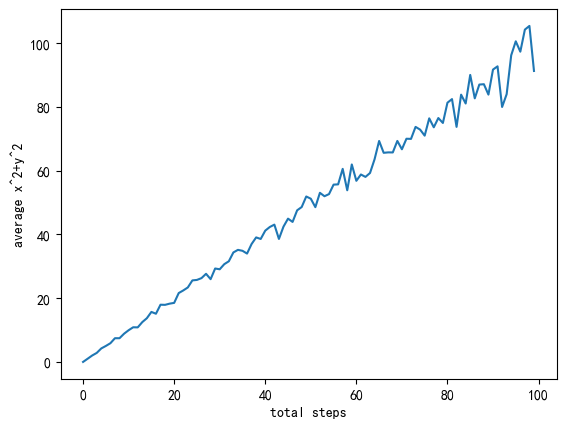

In [13]:
# This Python file uses the following encoding: utf-8
### 这段代码模拟了二维随机游走过程，完整运行这段代码后会绘制四个统计图，对应报告的图1 2 3
import random
import matplotlib.pyplot as plt
import numpy as np


def randomWalk(nsteps):  #输入模拟步数，返回(x,y)
    (x, y) = (0, 0)
    for i in range(nsteps):
        randomDecision = random.randint(1, 4)
        if randomDecision == 1:
            x += 1
        elif randomDecision == 2:
            x -= 1
        elif randomDecision == 3:
            y += 1
        else:
            y -= 1
    return (x, y)


(sumX, sumY) = (0, 0)
averageXY = []
sumDist = 0
averageDist = []

for i in range(1000):
    (x, y) = randomWalk(100)
    sumX += x
    sumY += y
    sumDist += x * x + y * y
    averageXY.append((sumX * 1.0 / (i + 1), sumY * 1.0 / (i + 1)))
    averageDist.append(sumDist * 1.0 / (i + 1))

averageXY = np.array(averageXY)  #转换成numpy数组方便处理

plt.xlabel('Times')
plt.ylabel('average X')
plt.plot(averageXY[:, 0])
plt.show()

plt.xlabel('Times')
plt.ylabel('average Y')
plt.plot(averageXY[:, 1])
plt.show()

plt.xlabel('Times')
plt.ylabel('average x^2+y^2')
plt.plot(averageDist)
plt.show()

distlList = []
sumDist = 0
for i in range(100):
    sumDist = 0
    for j in range(400):
        (x, y) = randomWalk(i)
        sumDist += x * x + y * y
        if j == 399:
            distlList.append(sumDist * 1.0 / (j + 1))

plt.xlabel('total steps')
plt.ylabel('average x^2+y^2')
plt.plot(distlList)
plt.show()